In [24]:
pwd

'C:\\Users\\Luqna Aziziyah\\Documents\\luqna\\kuliah\\sems 5\\PAL things\\Laporan Akhir\\Data SPKS'

 Lembur merupakan sebuah hal yang terjadi di dunia kerja dimana dalam setiap lembur yang dilakukan oleh karyawan akan mendapatkan upah lebih atas kerja kerasnya kepada perusahaan. Dari pemahaman tersebut, penulis akan melakukan analisis terkait data lembur karyawan di PT. PAL Indonesia terkait pengambilan keputusan lebih lanjut mengenai tahapan pengolahan data yang dimana kedepannya dapat dijadikan pengembangan lanjutan oleh PT. PAL Indonesia terkait upah yang diberikan pada karyawannya yang melaksanakan lembur selama 5 bulan kedepan.

## PERSIAPAN DATA

### IMPORT DATA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data_lembur_2021.csv')
df

,YearMonth,Total
0,2021-01,3.402222
1,2021-02,3.407604
2,2021-03,3.460874
3,2021-04,3.487810
4,2021-05,3.571429
5,2021-06,3.440538
6,2021-07,3.484600
7,2021-08,3.556636
8,2021-09,3.528673
9,2021-10,3.415604


Data diatas merupakan sebuah data rata-rata lama lembur karyawan di PT. PAL Indonesia mulai dari Januari 2021 hingga November 2023. Dari data tersebut

### MELIHAT TREND DAN MUSIM

Dari data tersebut, penting untuk melihat apakah data memiliki sebuah trend atau musiman untuk menentukan proses analisis lanjutan mengenai prediksi atau forecastingnya

<Figure size 1500x500 with 0 Axes>

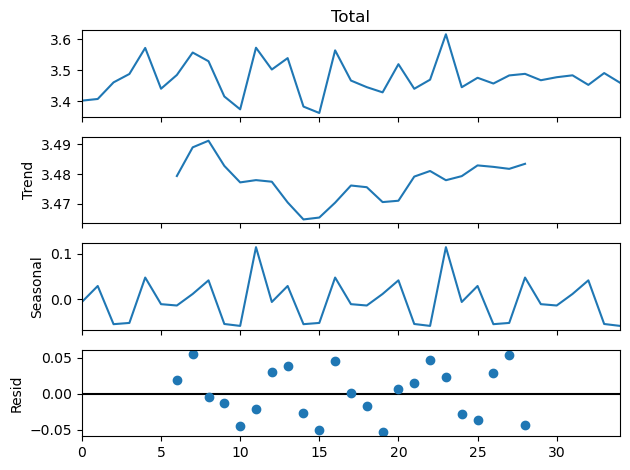

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

result = seasonal_decompose(df['Total'], model='additive', period=12)
plt.figure(figsize=(15, 5))

result.plot()
plt.show()


Dari grafik yang ditampilkan, dapat dilihat bahwasannya data tersebut tidak memiliki tanda adanya sebuah trend atau musiman yang dimana pemodelan time series ARIMA di duga cocok untuk melaksanakan prediksi lanjutan

### OUTLIER

Outlier data: [3.615238095238095]


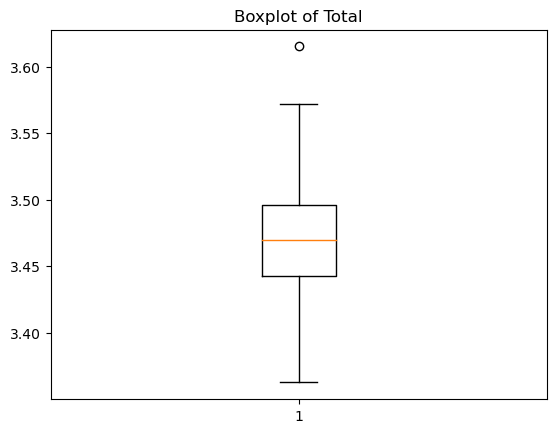

In [4]:
import numpy as np
import matplotlib.pyplot as plt

q1 = np.quantile(df['Total'], 0.25)
q3 = np.quantile(df['Total'], 0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Total'] < lower_bound) | (df['Total'] > upper_bound)]['Total']

print(f"Outlier data: {outliers.tolist()}")

plt.boxplot(df['Total'])
plt.title('Boxplot of Total')
plt.show()


setelah mengetahui bahwasannya data tidak memiliki pola terkait trend dan diketahui tidak terdapat missing value dalam data, maka langkah selanjutnya ialah melakukan pendeteksian outlier. Deteksi outlier yang digunakan pada kesempatan ini menggunakan metode IQR, metode ini lebih tahan terhadap nilai-nilai ekstrem dan tidak terpengaruh oleh ekstremum yang ada pada ekor distribusi data

dapat dilihat juga bahwasannya terdapat sebuah outlier yang bernilai 3.6 yang dimana tidak terlalu jauh dari kawanannya. Namun, untuk mendapatkan hasil yang optimal disini penulis melaksanakan imputasi terhadap outlier

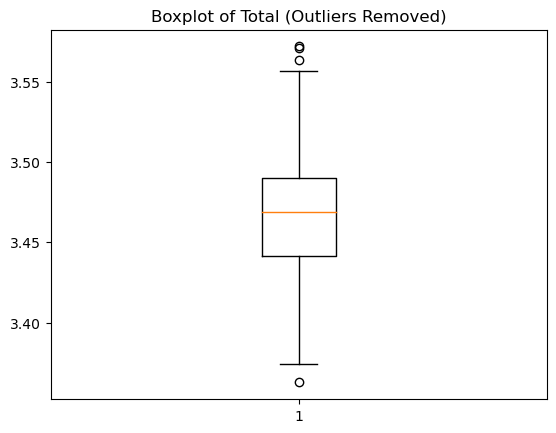

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

q1 = np.quantile(df['Total'], 0.25)
q3 = np.quantile(df['Total'], 0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Total'] < lower_bound) | (df['Total'] > upper_bound)]

df_no_outliers = df[~df.index.isin(outliers.index)]

plt.boxplot(df_no_outliers['Total'])
plt.title('Boxplot of Total (Outliers Removed)')
plt.show()


Dalam mengatasinya, disini menggunakan imputasi robust, yakni sebuah cara  imputasi outlier dengan mediana atau metode IQR. Disini penulis menggunakan IQR dimana outlier yang mendekati batas atas akan di imputasi dengan batas maximal yang telah diperhitungkan

## PEMODELAN

dari hasil analisis yang telah dilakukan sebalumnya bahwasannya data telah bersih dari missing value, outlier dan data tidak memiliki trend, maka pemodelan time series untuk melakukan forecasting terhadap rata-rata lembur karyawan di PT. PAL Indonesia dapat menggunakan metode ARIMA

### STASIONER DATA

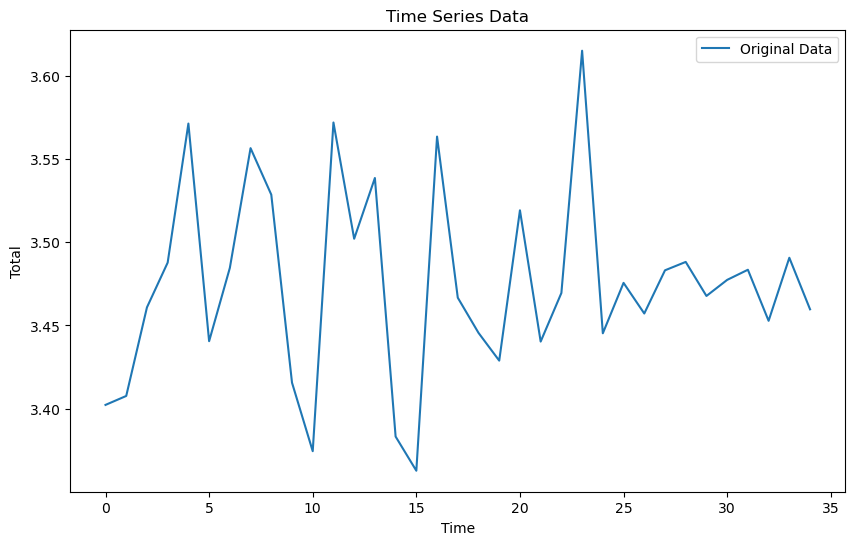

ADF Statistic: -5.394680917431816
p-value: 3.475434848106315e-06
Critical Values: {'1%': -3.653519805908203, '5%': -2.9572185644531253, '10%': -2.6175881640625}
Data is stationary. H0 rejected.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

column_to_test = 'Total'
data = df[column_to_test]

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Total')
plt.legend()
plt.show()

result = adfuller(data)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("Data is stationary. H0 rejected.")
else:
    print("Data is not stationary. H0 accepted.")


Dari hasil perhitungan dan grafik yang ditampilkan bahwasannya dapat diketahui H0 ditolak dimana data telah stasioner tanpa tahapan differencing sehingga diketahui nilai d = 0

### ORDE

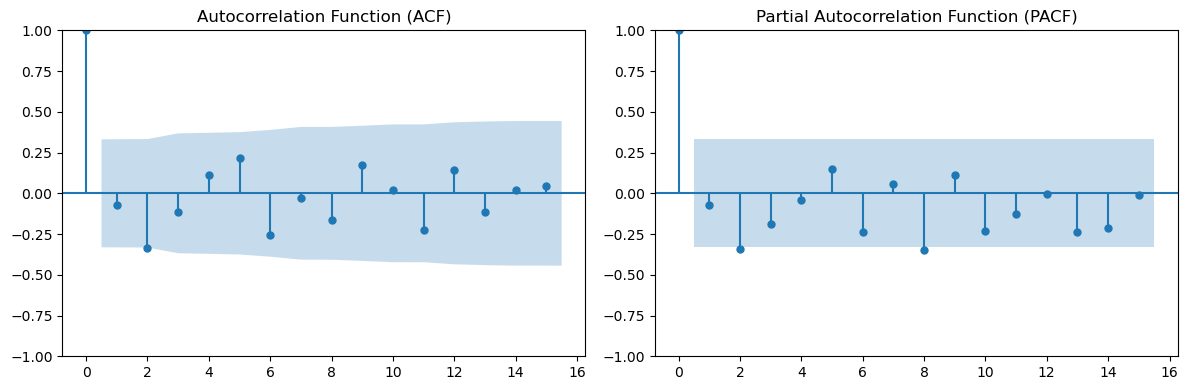

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

plot_acf(df['Total'], lags=15, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(df['Total'], lags=15, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

dari plot ACF dan PACF diketahui bahwasannya nilai ACF dan PACF signifikan untuk lag 1 dan 2, untuk plot pacf hal ini menunjukkan bahwa nilai q dan p kemungkinan adalah 1 dan 2.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

p = 2  # Sesuaikan berdasarkan plot_pacf
d = 0  # Sesuaikan agar data menjadi stasioner
q = 1  # Sesuaikan berdasarkan plot_acf

model = ARIMA(df['Total'], order=(2, 0, 1))
results = model.fit()

print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   35
Model:                 ARIMA(2, 0, 1)   Log Likelihood                  55.196
Date:                Sat, 13 Jan 2024   AIC                           -100.392
Time:                        21:36:35   BIC                            -92.615
Sample:                             0   HQIC                           -97.707
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4770      0.002   2072.772      0.000       3.474       3.480
ar.L1          0.5956      0.187      3.189      0.001       0.230       0.962
ar.L2         -0.2347      0.191     -1.226      0.2

C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

p = 1  # Sesuaikan berdasarkan plot_pacf
d = 0  # Sesuaikan agar data menjadi stasioner
q = 1  # Sesuaikan berdasarkan plot_acf

model = ARIMA(df['Total'], order=(1, 0, 1))
results = model.fit()

print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   35
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  54.256
Date:                Sat, 13 Jan 2024   AIC                           -100.511
Time:                        21:37:02   BIC                            -94.290
Sample:                             0   HQIC                           -98.364
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4769      0.002   1784.388      0.000       3.473       3.481
ar.L1          0.4918      0.243      2.028      0.043       0.016       0.967
ma.L1         -0.9981      7.321     -0.136      0.8

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

p = 1  # Sesuaikan berdasarkan plot_pacf
d = 0  # Sesuaikan agar data menjadi stasioner
q = 2  # Sesuaikan berdasarkan plot_acf

model = ARIMA(df['Total'], order=(1, 0, 2))
results = model.fit()

print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   35
Model:                 ARIMA(1, 0, 2)   Log Likelihood                  55.611
Date:                Sat, 13 Jan 2024   AIC                           -101.223
Time:                        21:35:13   BIC                            -93.446
Sample:                             0   HQIC                           -98.538
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4770      0.001   2448.764      0.000       3.474       3.480
ar.L1         -0.2550      0.292     -0.875      0.382      -0.826       0.316
ma.L1         -0.1107      1.451     -0.076      0.9

C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Melalui hasil-hasil ini, adapun nilai dari dari sarimax result dengan nilai AIC dan BIC terkecil ialah orde (1, 0, 2)

C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


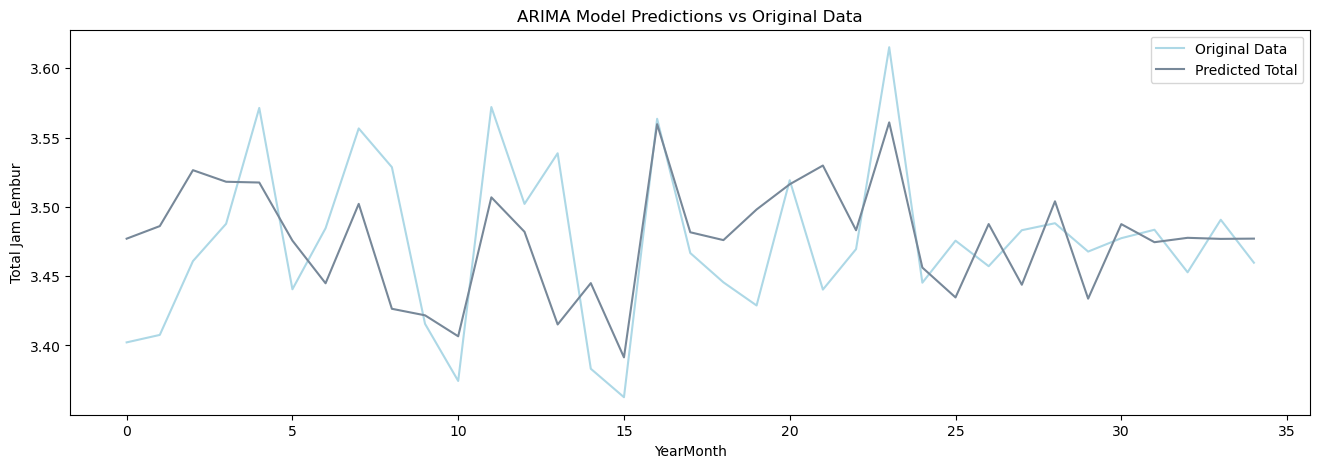

Root Mean Squared Error (RMSE): 0.049527826613383466
Mean Squared Error (MSE): 0.0024530056090453756
Mean Absolute Percentage Error (MAPE): 1.15%


In [18]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

start_date = df.index.min()
end_date = df.index.max()    

train_size = int(len(df) * 0.80)
train, test = df.iloc[:train_size], df.iloc[train_size:]


order = (1, 0, 2)
model = sm.tsa.ARIMA(train["Total"], order=order)
model_fit = model.fit()

predictions = model_fit.predict(start=start_date, end=end_date)

prediksi_df = pd.DataFrame({'YearMonth': predictions.index, 'Predicted_Total': predictions.values})

plt.figure(figsize=(16, 5))
plt.plot(df.index, df["Total"], label='Original Data', color='#ADD8E6')
plt.plot(prediksi_df['YearMonth'], prediksi_df['Predicted_Total'], label='Predicted Total', color='#778899')
plt.title('ARIMA Model Predictions vs Original Data')
plt.xlabel('YearMonth')
plt.ylabel('Total Jam Lembur')
plt.legend()
plt.show()

# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(df["Total"], predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Menghitung MSE
mse = mean_squared_error(df["Total"], predictions)
print(f"Mean Squared Error (MSE): {mse}")

ape = np.abs((df["Total"] - predictions) / df["Total"])

ape = ape.replace([np.inf, -np.inf], np.nan)
ape = ape.fillna(0)

mape = np.mean(ape)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")



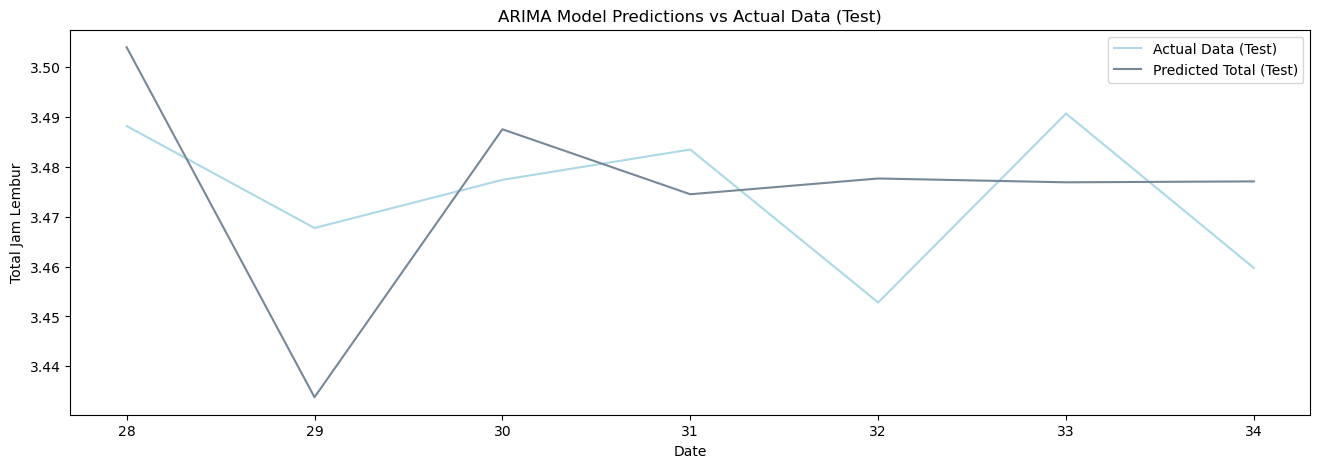

Mean Squared Error (MSE) on Test Data: 0.00038562096530145746
Root Mean Squared Error (RMSE) on Test Data: 0.019637234156098905
Mean Absolute Percentage Error (MAPE) on Test Data: 0.51%


In [19]:
# Buat prediksi pada data pengujian
predictions_test = model_fit.predict(start=test.index.min(), end=test.index.max())

# Buat DataFrame dari prediksi dengan tanggal pada data pengujian
prediksi_test_df = pd.DataFrame({'YearMonth': predictions_test.index, 'Predicted_Total': predictions_test.values})

# Plot prediksi pada data pengujian
plt.figure(figsize=(16, 5))
plt.plot(test.index, test["Total"], label='Actual Data (Test)', color='#ADD8E6')
plt.plot(prediksi_test_df['YearMonth'], prediksi_test_df['Predicted_Total'], label='Predicted Total (Test)', color='#778899')
plt.title('ARIMA Model Predictions vs Actual Data (Test)')
plt.xlabel('Date')
plt.ylabel('Total Jam Lembur')
plt.legend()
plt.show()

# Hitung MSE pada data pengujian
mse_test = mean_squared_error(test["Total"], predictions_test)
print(f"Mean Squared Error (MSE) on Test Data: {mse_test}")

# Hitung RMSE pada data pengujian
rmse_test = np.sqrt(mse_test)
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse_test}")


from sklearn.metrics import mean_squared_error, mean_absolute_error

# Hitung MAPE pada data pengujian
mape_test = np.mean(np.abs((test["Total"] - predictions_test) / test["Total"])) * 100

print(f"Mean Absolute Percentage Error (MAPE) on Test Data: {mape_test:.2f}%")


dari hasil pengujian dengan pembagian data 80:20 dapat dilihat bahwasannya nilai dari MSE, RMSE, dan MAPE bernilai kecil sehingga dikata pemodelan dengan oder (1, 0, 2) cocok untuk pelaksanaan forecasting terkait rata-rata lembur karyawan di PT. PAL Indonesia selama 5 bulan kedepan

dilihat bahwa nilai MAPE < dari 10% sehingga dikatakan model sangat baik untuk memprediksi

In [14]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Simpan data Anda ke dalam df

# Pilih orde model ARIMA
order = (1, 0, 2)

# Tentukan jumlah fold untuk TimeSeriesSplit
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Inisialisasi list untuk menyimpan hasil evaluasi
rmse_scores = []

# Iterasi melalui setiap fold
for i, (train_index, test_index) in enumerate(tscv.split(df)):
    train, test = df.iloc[train_index], df.iloc[test_index]

    # Latih model ARIMA
    model = ARIMA(train["Total"], order=order)
    model_fit = model.fit()

    # Buat prediksi
    predictions = model_fit.predict(start=test.index.min(), end=test.index.max())

    # Evaluasi kinerja dengan RMSE
    rmse = np.sqrt(mean_squared_error(test["Total"], predictions))
    rmse_scores.append(rmse)

    # Cetak RMSE untuk setiap fold
    print(f"RMSE for Fold {i+1}: {rmse}")

# Jika Anda ingin mencetak rata-rata RMSE juga, gunakan baris berikut:
average_rmse = np.mean(rmse_scores)
print(f"\nAverage RMSE across {n_splits} folds: {average_rmse}")


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE for Fold 1: 0.07234223206590475


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE for Fold 2: 0.06372151830619897
RMSE for Fold 3: 0.07516367921157864


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE for Fold 4: 0.027809433781422158
RMSE for Fold 5: 0.025862583969433302

Average RMSE across 5 folds: 0.052979889466907557


dapat dilihat juga untuk hasil cross validation tersebut bahwasannya pemodelan tidak mengalami overfitting dan dikata cocok untuk melakukan forecasting

### FORECASTING

In [15]:
df

,YearMonth,Total
0,2021-01,3.402222
1,2021-02,3.407604
2,2021-03,3.460874
3,2021-04,3.487810
4,2021-05,3.571429
5,2021-06,3.440538
6,2021-07,3.484600
7,2021-08,3.556636
8,2021-09,3.528673
9,2021-10,3.415604


In [22]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Total'], order=(1, 0, 2))
model_fit = model.fit()

predictions = model_fit.predict(start=len(df), end=len(df) + 5, typ='levels')

predictions


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


35    3.462076
36    3.508913
37    3.468894
38    3.479099
39    3.476496
40    3.477160
Name: predicted_mean, dtype: float64

In [21]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Total'], order=(1, 0, 2))
model_fit = model.fit()

forecast_steps = 5
predictions = model_fit.predict(start=len(df), end=len(df) + forecast_steps - 1, typ='levels')

# Create a new dataframe for predictions
prediction_df = pd.DataFrame({
    'YearMonth': pd.date_range(start=df['YearMonth'].iloc[-1], periods=forecast_steps + 1, freq='M')[1:],  # Assuming 'YearMonth' column is datetime
    'Predicted_Total': predictions.values
})

# Display the dataframe with predictions
prediction_df


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,YearMonth,Predicted_Total
0,2023-12-31,3.462076
1,2024-01-31,3.508913
2,2024-02-29,3.468894
3,2024-03-31,3.479099
4,2024-04-30,3.476496


In [21]:
# Menyimpan dataframe dengan prediksi ke dalam file CSV
prediction_df.to_csv('FORECASTING.csv', index=False)


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unkn

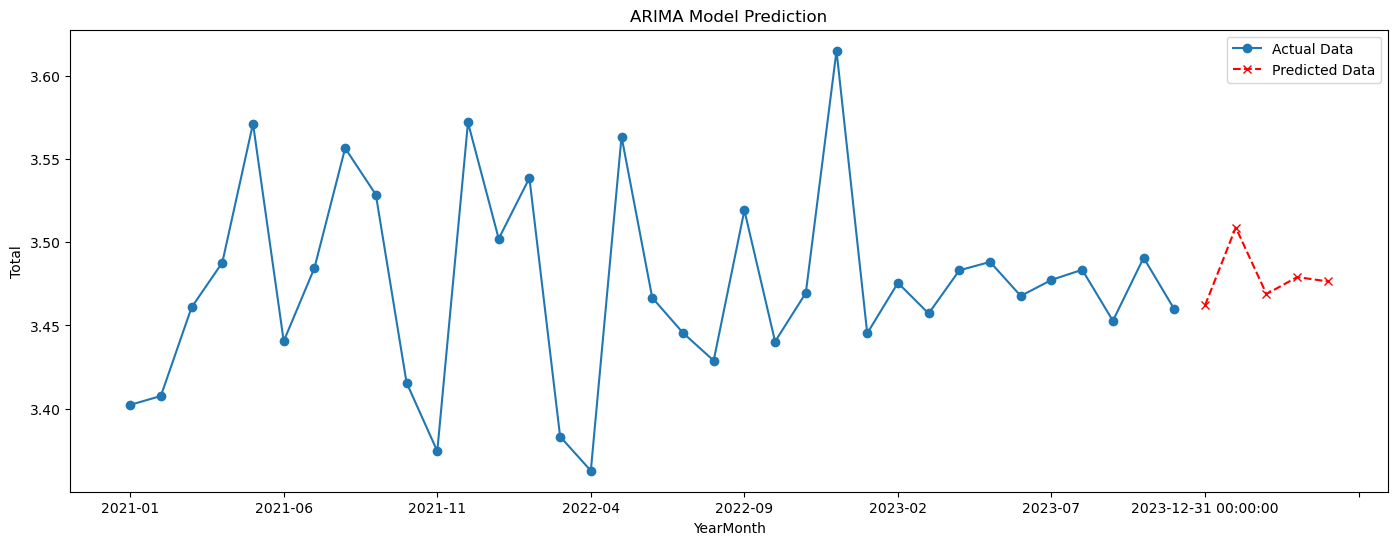

2023-12-01    3.462076
2024-01-01    3.508913
2024-02-01    3.468894
2024-03-01    3.479099
2024-04-01    3.476496
Freq: MS, Name: predicted_mean, dtype: float64


In [18]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming df is your original dataframe

# Set 'YearMonth' as the index
df.set_index('YearMonth', inplace=True)

# Fit ARIMA model
model = ARIMA(df['Total'], order=(1, 0, 2))
model_fit = model.fit()

# Make predictions
forecast_steps = 5
predictions = model_fit.predict(start=len(df), end=len(df) + forecast_steps - 1, typ='levels')

# Create a new dataframe for predictions
prediction_df = pd.DataFrame({
    'YearMonth': pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='M')[1:],
    'Predicted_Total': predictions.values
})

# Merge original data with predictions and reset index
merged_df = pd.concat([df, prediction_df.set_index('YearMonth')], axis=0)

# Plot the original data and predictions as line plots
plt.figure(figsize=(17, 6))
merged_df['Total'].plot(label='Actual Data', linestyle='-', marker='o')
merged_df['Predicted_Total'].plot(label='Predicted Data', linestyle='--', marker='x', color='red')
plt.title('ARIMA Model Prediction')
plt.xlabel('YearMonth')
plt.ylabel('Total')
plt.legend()
plt.show()

# Print predictions
print(predictions)
